In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.

In [2]:
from pycaret.datasets import get_data
data = get_data('/content/drive/MyDrive/train')

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
w=data.drop(['id'], axis=1)
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [4]:
from pycaret.classification import *
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
newdata1 = w.apply(le.fit_transform)
newdata1.head()

,label,tweet
0,0,4653
1,0,9491
2,0,564
3,0,6704
4,0,4954


In [5]:
newdata = setup(newdata1, target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(31962, 2)"
4,Transformed data shape,"(31962, 2)"
5,Transformed train set shape,"(22373, 2)"
6,Transformed test set shape,"(9589, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [6]:
data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9362,0.7950,0.0988,0.9289,0.1776,0.1664,0.2889,1.6700
knn,K Neighbors Classifier,0.9342,0.7526,0.2587,0.5665,0.3547,0.3251,0.3533,0.2700
lightgbm,Light Gradient Boosting Machine,0.9314,0.7951,0.0516,0.6340,0.0944,0.0850,0.1642,1.2460
xgboost,Extreme Gradient Boosting,0.9309,0.7987,0.0478,0.6295,0.0879,0.0784,0.1562,0.1550
lr,Logistic Regression,0.9299,0.5184,0.0000,0.0000,0.0000,0.0000,0.0000,1.2280
nb,Naive Bayes,0.9299,0.6162,0.0000,0.0000,0.0000,0.0000,0.0000,0.0710
ridge,Ridge Classifier,0.9299,0.5184,0.0000,0.0000,0.0000,0.0000,0.0000,0.0560
qda,Quadratic Discriminant Analysis,0.9299,0.6163,0.0000,0.0000,0.0000,0.0000,0.0000,0.0370
ada,Ada Boost Classifier,0.9299,0.7620,0.0000,0.0000,0.0000,0.0000,0.0000,0.4190
lda,Linear Discriminant Analysis,0.9299,0.5184,0.0000,0.0000,0.0000,0.0000,0.0000,0.0370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

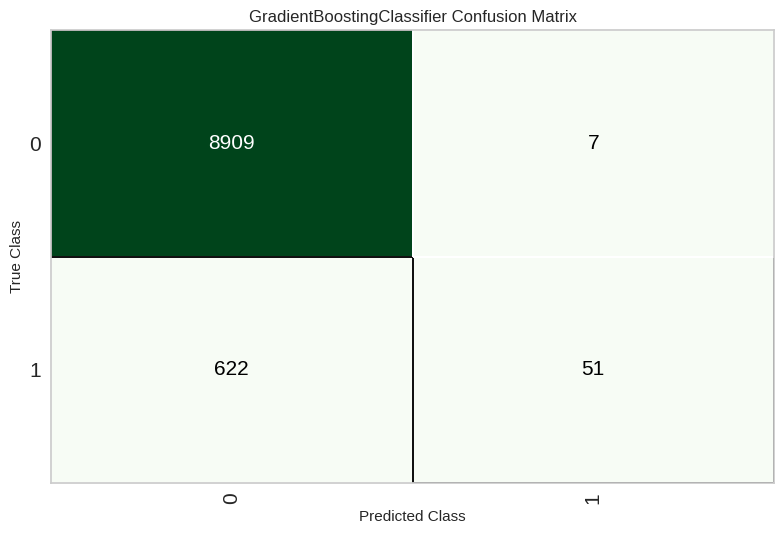

In [8]:
plot_model(best, plot = 'confusion_matrix')

In [9]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9344,0.7927,0.0758,0.8793,0.1395,0.1298,0.2471


In [11]:
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9343,0.7979,0.0637,1.0000,0.1198,0.1123,0.2439
1,0.9374,0.8116,0.1146,0.9474,0.2045,0.1923,0.3178
2,0.9370,0.7942,0.1019,1.0000,0.1850,0.1743,0.3089
3,0.9356,0.7736,0.0897,0.8750,0.1628,0.1518,0.2683
4,0.9388,0.8137,0.1401,0.9167,0.2431,0.2287,0.3451
5,0.9361,0.7717,0.1083,0.8500,0.1921,0.1791,0.2899
6,0.9338,0.7883,0.0764,0.8000,0.1395,0.1289,0.2347
7,0.9370,0.8027,0.1146,0.9000,0.2034,0.1906,0.3085
8,0.9379,0.8071,0.1146,1.0000,0.2057,0.1941,0.3278


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9383,0.8279,0.2357,0.6727,0.3491,0.3245,0.3745
1,0.9383,0.8357,0.2739,0.6418,0.3839,0.3569,0.3932
2,0.9410,0.8199,0.2548,0.7273,0.3774,0.3538,0.4084
3,0.9388,0.8185,0.2179,0.6939,0.3317,0.3087,0.3667
4,0.9405,0.8472,0.2994,0.6714,0.4141,0.3876,0.4230
5,0.9388,0.8331,0.2229,0.7000,0.3382,0.3149,0.3728
6,0.9343,0.8314,0.2102,0.5893,0.3099,0.2834,0.3256
7,0.9356,0.8107,0.2357,0.6066,0.3394,0.3124,0.3516
8,0.9401,0.8508,0.3057,0.6575,0.4174,0.3902,0.4223


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [15]:
g1 = predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9344,0.7927,0.0758,0.8793,0.1395,0.1298,0.2471


In [14]:
g2 = predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9395,0.8236,0.2526,0.6883,0.3696,0.3449,0.3934


In [39]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
knn = create_model('knn')
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9339,0.7562,0.2611,0.5616,0.3565,0.3265,0.3534
1,0.9366,0.7947,0.2930,0.5974,0.3932,0.3638,0.3897
2,0.9370,0.7536,0.2739,0.6143,0.3789,0.3508,0.3828
3,0.9347,0.7374,0.2179,0.5862,0.3178,0.2910,0.3308
4,0.9361,0.7638,0.2994,0.5875,0.3966,0.3666,0.3900
5,0.9352,0.7710,0.2548,0.5882,0.3556,0.3270,0.3591
6,0.9303,0.7469,0.2357,0.5068,0.3217,0.2901,0.3140
7,0.9312,0.7368,0.2420,0.5205,0.3304,0.2992,0.3238
8,0.9370,0.7435,0.2994,0.6026,0.4000,0.3707,0.3961


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9406,0.8431,0.2293,0.7500,0.3512,0.3292,0.3941
1,0.9406,0.8509,0.2420,0.7308,0.3636,0.3406,0.3989
2,0.9441,0.8306,0.2548,0.8333,0.3902,0.3695,0.4424
3,0.9414,0.8298,0.2244,0.7778,0.3483,0.3273,0.3983
4,0.9437,0.8425,0.2484,0.8298,0.3824,0.3617,0.4356
5,0.9370,0.8425,0.2229,0.6481,0.3318,0.3069,0.3558
6,0.9374,0.8153,0.1975,0.6889,0.3069,0.2846,0.3470
7,0.9392,0.8254,0.2102,0.7333,0.3267,0.3050,0.3719
8,0.9419,0.8272,0.2357,0.7872,0.3627,0.3414,0.4112


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [16]:
k1 = predict_model(knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9371,0.7571,0.2630,0.6232,0.3699,0.3425,0.3782


In [17]:
k2 = predict_model(tuned_knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9426,0.8347,0.2526,0.7834,0.3820,0.3601,0.4248


In [40]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
lr = create_model('lr')
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
l1 = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9298,0.5200,0.0000,0.0000,0.0000,0.0000,0.0000


In [21]:
l2 = predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9298,0.5200,0.0000,0.0000,0.0000,0.0000,0.0000


In [22]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
nb = create_model('nb')
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5989,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.6016,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.6020,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.6247,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.6198,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.6527,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.6189,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.6034,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.6171,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5989,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.6016,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.6020,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.6247,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.6198,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.6527,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.6189,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.6034,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.6171,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
n1 = predict_model(nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9298,0.6226,0.0000,0.0000,0.0000,0.0000,0.0000


In [25]:
n2 = predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9298,0.6226,0.0000,0.0000,0.0000,0.0000,0.0000


In [26]:
evaluate_model(nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
ridge = create_model('ridge')
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
r1 = predict_model(ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9298,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [29]:
r2 = predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9298,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [30]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
ada = create_model('ada')
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.7658,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.7728,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.7653,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.7360,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.7827,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.7409,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.7428,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.7764,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.7768,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.7443,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.7440,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.7425,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.7199,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.7594,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.7278,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.7361,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.7509,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.7567,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [32]:
a1 = predict_model(ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9298,0.7649,0.0000,0.0000,0.0000,0.0000,0.0000


In [33]:
a2 = predict_model(tuned_ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9298,0.7649,0.0000,0.0000,0.0000,0.0000,0.0000


In [34]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [35]:
lda = create_model('lda')
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [36]:
ld1 = predict_model(lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9298,0.5200,0.0000,0.0000,0.0000,0.0000,0.0000


In [37]:
ld2 = predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9298,0.5200,0.0000,0.0000,0.0000,0.0000,0.0000


In [38]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…